## Problem Set 1


## Part 1

### Load the data

In [16]:
import pandas as pd

In [10]:
import pandas as pd
path = 'Problem_Set1_2025.xlsx'
df = pd.read_excel(
    path,
    engine="openpyxl",
    sheet_name=0,   
    header=5,       
    decimal=",",    
)

In [11]:
df['date'] = pd.to_datetime(df['date'].astype(str), format="%Y%m").dt.to_period("M")
df = df.set_index('date').sort_index()


In [12]:
df = df.drop(columns=["Unnamed: 51"])

In [17]:
df.head()

,TXN,ISRG,CIEN,BHI,WDC,CAH,CCI,BBT,TAP,VMC,...,DVN,A,ADI,XRX,ALL,QRVO,PPL,DUK,EQT,Market (Value Weighted Index)
date,,,,,,,,,,,,,,,,,,,,,
2001-01,-7.5013,-1.4706,10.8462,-0.5113,116.6154,-4.3413,3.2333,-1.2127,-13.4008,-5.0026,...,-10.1197,-0.3653,22.2955,76.6487,-10.7489,-21.1845,-7.1646,-14.2053,-12.0899,3.959900
2001-02,-32.5342,-13.4328,-25.3990,-4.9214,-21.9697,6.5058,-10.0671,-1.3650,-3.4723,-6.4314,...,4.0146,-34.0055,-40.4153,-25.4590,3.0093,-48.5549,8.9154,12.1821,-1.6786,-9.909901
2001-03,4.8393,-32.7586,-37.8605,-7.3724,15.5340,-4.6502,-41.0448,-2.6571,-2.2554,10.6308,...,2.1930,-14.6389,-2.8418,-0.8278,5.2183,5.0562,-3.2064,4.8834,20.2091,-7.039000
2001-04,24.9879,35.3846,31.8802,8.2071,11.7647,4.4961,65.3333,1.3648,-20.5379,-1.2812,...,1.3917,26.9444,30.5464,50.9182,-0.4530,151.3797,25.1137,9.4057,15.9420,8.383100
2001-05,-11.8346,-2.2727,-1.6527,0.5727,-18.9850,6.8101,-32.2172,2.0610,0.2019,17.4670,...,-1.3557,-14.0220,-5.8339,9.6239,8.2874,-11.2321,8.5636,-1.6360,-6.8500,1.045800


In [13]:
import matplotlib.pyplot as plt

N=5: Mean=1.5223, StdDev=9.1178
N=10: Mean=1.2407, StdDev=6.5955
N=25: Mean=1.2200, StdDev=5.4496
N=50: Mean=1.2084, StdDev=5.3901


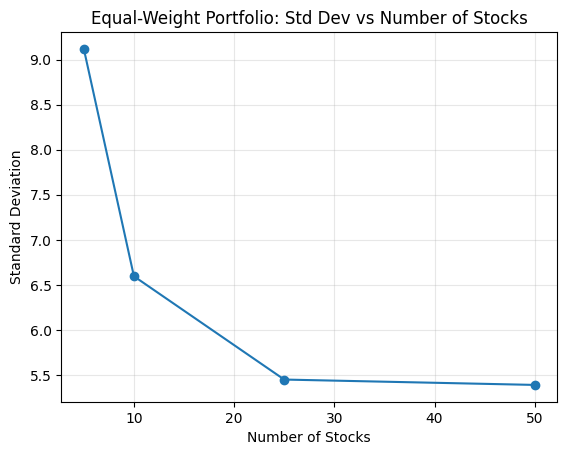

In [14]:
returns = df.iloc[:, 1:51] 
portfolio_sizes = [5, 10, 25, 50]

means, stds = [], []

for N in portfolio_sizes:
    port_ret = returns.iloc[:, :N].mean(axis=1) # average return across those N assets for each time period
    means.append(port_ret.mean())
    stds.append(port_ret.std(ddof=1))

for N, m, s in zip(portfolio_sizes, means, stds):
    print(f"N={N}: Mean={m:.4f}, StdDev={s:.4f}")

plt.plot(portfolio_sizes, stds, marker="o")
plt.title("Equal-Weight Portfolio: Std Dev vs Number of Stocks")
plt.xlabel("Number of Stocks")
plt.ylabel("Standard Deviation")
plt.grid(True, alpha=0.3)
plt.show()


This is a concave curve
Shows a declining curve, very steep at first (from N=5 to N=10) and then flattening (from N=25 to N=50).


Are the results consistent with what you would expect theoretically?

As N (number of stocks) increases, stds (risk) should go down as we are diversifying the portfolio with different stocks that have different standard deviation. This is exactly what we would expect because diversification has the largest benefit when adding the first few stocks, but additional stocks don't have as much impact when the portfolio is already well diversified. 


Do more stocks eliminate all risk?
x The variance of the portfolio will always be less than the variances of each individual stock, so long as correlation < 1. The risk cannot go to zero. It would only be zero if every asset could be paired with another that is perfectly negatively correlated, which is not the case in reality. Therefore, diversification lowers risk, but only down to a positive limit.

(b)

[np.float64(0.5232112398609686), np.float64(0.34818421743317085), np.float64(0.1677594453852024), np.float64(0.07852315910218649)]


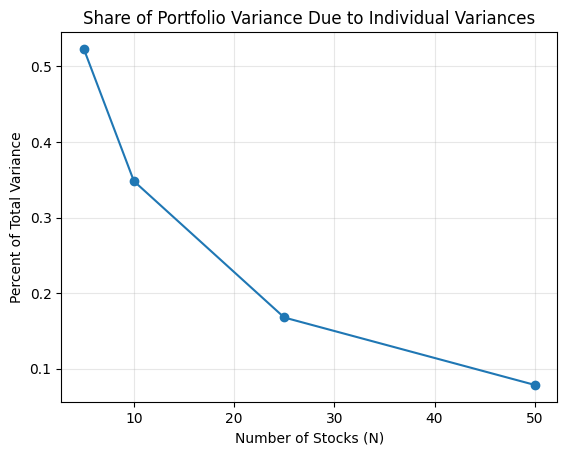

In [9]:

pct_var = []

for N in portfolio_sizes:
    R = returns.iloc[:, :N]                   
    var_part = R.var(ddof=1).sum() / (N**2)  # (sum of individual variances)/N^2
    port_var = R.mean(axis=1).var(ddof=1)    # variance of equal-weight portfolio return
    pct_var.append(var_part / port_var)

print(pct_var)
plt.plot(portfolio_sizes, pct_var, marker="o")
plt.title("Share of Portfolio Variance Due to Individual Variances")
plt.xlabel("Number of Stocks (N)")
plt.ylabel("Percent of Total Variance")
plt.grid(True, alpha=0.3)
plt.show()


The plot shows that the share of portfolio variance coming from individual variances decreases as the number of stocks increases. With only 5 stocks, over half of the variance comes from the individual stock variances, but by 50 stocks this falls to under 10%.

Thus, the curve is downward-sloping and convex, showing that diversification reduces the importance of individual variances, while co-movements (covariances) drive almost all portfolio risk when N is large.

This, once again, is consistent with theory: in the formula for portfolio variance, when we average more stocks, the impact of each stock’s own variance shrinks, because it is scaled by 1/N^2. At the same time, the number of covariance terms between stocks grows rapidly. 

(c)

A value-weighted portfolio puts more weight on big companies, while an equal-weighted portfolio gives every stock the same weight.
Whether VW has more or less variance depends on the properties of the large companies:
- If big companies are more stable (lower variance, lower correlation), VW will have less variance than EW.
- If big companies are more volatile or are more correlated, VW can have more variance.

If large-cap stocks (which get bigger VW weights) have lower variances than the average stock, VW can have lower variance than EW. If they are more volatile, VW can be higher variance. (This is just 𝑊′Σ𝑊 applied to different 𝜎𝑖𝑖 σii.)

(d)

In [ ]:
from scipy import stats

results = []
for N in portfolio_sizes:
    R = returns.iloc[:, :N]          
    port = R.mean(axis=1)            
    tstat, pval = stats.ttest_1samp(port, 0) 
    print(f"N={N}: mean={port.mean():.4f}, t={tstat:.2f}, p={pval:.4f}")


N=5: mean=1.5223, t=2.24, p=0.0263
N=10: mean=1.2407, t=2.52, p=0.0125
N=25: mean=1.2200, t=3.00, p=0.0031
N=50: mean=1.2084, t=3.01, p=0.0030
